In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Пропусков много, выведем все столбцы, в которых есть пропуски:

In [5]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df.isnull().sum()[df.isnull().sum() != 0])

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


<Axes: >

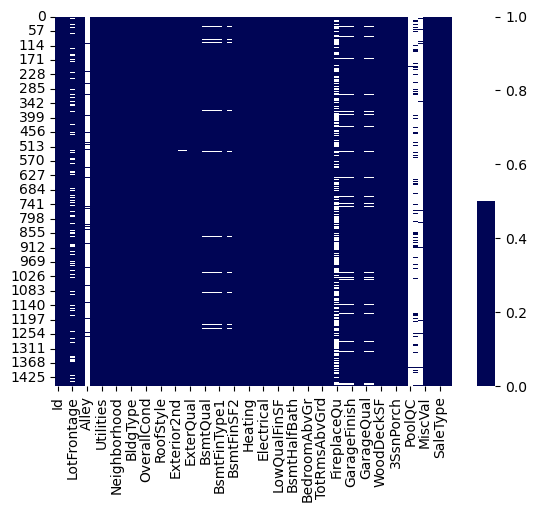

In [6]:
import seaborn as sns
cols = df.columns[:100]
colors = ['#000555', '#FFFFFF']
sns.heatmap(df[cols].isnull(), cmap = sns.color_palette(colors))

In [7]:
lot_frontage = df['LotFrontage'].value_counts()
print(lot_frontage)

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64


LotFrontage имеет числовые значения или n/a. Заполним нулями значения n/a для объектов без фасада.

In [8]:
df['LotFrontage'] = df['LotFrontage'].fillna(0)

In [9]:
alley = df['Alley'].value_counts()
print(alley)

Grvl    50
Pave    41
Name: Alley, dtype: int64


Большая часть не заполнена, но, думаю, правильно будет выполнить one-hot encoding и вывести отдельный столбец "Has_Alley"

In [10]:
df['Has_Alley'] = df['Alley'].notnull().astype(int) 
dummies = pd.get_dummies(df['Alley'])
df = pd.concat([df, dummies], axis=1)
df = df.drop('Alley', axis=1)

теперь MasVnrType

In [11]:
MasVnrType = df['MasVnrType'].value_counts()
print(MasVnrType)

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64


In [12]:
df['MasVnrType'] = df['MasVnrType'].fillna('None')

MasVnrArea:

In [13]:
MasVnrArea = df['MasVnrArea'].value_counts()
print(MasVnrArea)

0.0      861
180.0      8
72.0       8
108.0      8
120.0      7
        ... 
562.0      1
89.0       1
921.0      1
762.0      1
119.0      1
Name: MasVnrArea, Length: 327, dtype: int64


Здесь такие же пропуски что и в предыдущем значении, проставим на их место нули:

In [14]:
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)

В столбце с состоянием подвала тоже есть пропуски. В столбце TotalBsmtSF пропусков нет, но у 37 значений есть нулевая площадь. Есть предположение, что в файле отсутствующие подвалы не корректно отображены.

In [15]:
TotalBsmtSF = df['TotalBsmtSF'].value_counts()
print(TotalBsmtSF)

0       37
864     35
672     17
912     15
1040    14
        ..
1838     1
1581     1
707      1
611      1
1542     1
Name: TotalBsmtSF, Length: 721, dtype: int64


In [16]:
mask = (df['TotalBsmtSF'] == 0)
df.loc[mask, 'BsmtQual'] = 'n/a'

In [17]:
mask = (df['TotalBsmtSF'] == 0)
df.loc[mask, 'BsmtCond'] = 'n/a'
df.loc[mask, 'BsmtExposure'] = 'n/a'
df.loc[mask, 'BsmtFinType1'] = 'n/a'
df.loc[mask, 'BsmtFinType2'] = 'n/a'

In [18]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df.isnull().sum()[df.isnull().sum() != 0])

BsmtExposure       1
BsmtFinType2       1
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


Пропусков почти нет. Остался один объект с ненулевой площадью и пропуском в значении "BsmtExposure" и "BsmtFinType2". Тоже явно обозначим отсутствие данных как n/a:

In [19]:
df['BsmtExposure'] = df['BsmtExposure'].fillna('n/a')
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('n/a')

Уберем пропуски в столбце "Electrical":

In [20]:
Electrical = df['Electrical'].value_counts()
print(Electrical)

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64


In [21]:
mask = df['Electrical'].isnull()
print(df[mask])

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
1379  1380          80       RL         73.0     9735   Pave      Reg   

     LandContour Utilities LotConfig  ... MiscFeature MiscVal MoSold YrSold  \
1379         Lvl    AllPub    Inside  ...         NaN       0      5   2008   

     SaleType SaleCondition  SalePrice  Has_Alley  Grvl  Pave  
1379       WD        Normal     167500          0     0     0  

[1 rows x 83 columns]


Ничего критичного не видим, предположу, что для одной строки не критично - заполнить значением 'n/a':

In [22]:
df['Electrical'] = df['Electrical'].fillna('n/a')

на очереди столбец Fireplaces

In [23]:
Fireplaces = df['Fireplaces'].value_counts()
print(Fireplaces)

0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64


Заполним столбец FireplaceQu с пропусками значением "n/a" для тех строк, где количество каминов - 0.

In [24]:
mask = (df['Fireplaces'] == 0)
df.loc[mask, 'FireplaceQu'] = 'n/a'

In [25]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df.isnull().sum()[df.isnull().sum() != 0])

GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


Пропусков больше нет. Далее у нас пропуски данных в столбце с гаражами. Посмотрим на столбец с полными данными, относящийся к гаражу:

In [26]:
GarageCars = df['GarageCars'].value_counts()
print(GarageCars)

2    824
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64


Количество домов без гаража соответствует количеству пропущенных значений в столбцах с описанием. Заполним также значением "n/a" во всех строках, кроме года постройки.

In [27]:
mask = (df['GarageCars'] == 0)
df.loc[mask, 'GarageType'] = 'n/a'
df.loc[mask, 'GarageFinish'] = 'n/a'
df.loc[mask, 'GarageQual'] = 'n/a'
df.loc[mask, 'GarageCond'] = 'n/a'

In [28]:
GarageYrBlt = df['GarageYrBlt'].value_counts()
print(GarageYrBlt)

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1927.0     1
1900.0     1
1906.0     1
1908.0     1
1933.0     1
Name: GarageYrBlt, Length: 97, dtype: int64


Чтобы не отбрасывать данные, заполним значение медианным и переведем значение в int

In [29]:
median = df['GarageYrBlt'].median()
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(median)

In [30]:
df['GarageYrBlt'] = df['GarageYrBlt'].astype(int)

"PoolQC". Посмотрим, какие данные у нас в площади бассейнов:

In [31]:
PoolArea = df['PoolArea'].value_counts()
print(PoolArea)

0      1453
512       1
648       1
576       1
555       1
480       1
519       1
738       1
Name: PoolArea, dtype: int64


In [32]:
PoolQC = df['PoolQC'].value_counts()
print(PoolQC)

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64


выполним one-hot encoding, добавим столбец "HasPool" отдельным столбцом выведем типы бассейнов:

In [33]:
df['HasPool'] = df['PoolQC'].notnull().astype(int) 
dummies = pd.get_dummies(df['PoolQC'])
df = pd.concat([df, dummies], axis=1)
df = df.drop('PoolQC', axis=1)

то же самое с заборами

In [34]:
df['HasFence'] = df['Fence'].notnull().astype(int) 
dummies = pd.get_dummies(df['Fence'])
df = pd.concat([df, dummies], axis=1)
df = df.drop('Fence', axis=1)

MiscFeature:

In [35]:
MiscFeature = df['MiscFeature'].value_counts()
print(MiscFeature)

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64


In [36]:
df['MiscFeature'] = df['MiscFeature'].fillna('None')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 90 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

Переименуем добавленные колонки:

In [38]:
df = df.rename(columns={'Grvl': 'AlleyGrvl', 
                        'Pave': 'AlleyPave'})

In [39]:
df = df.rename(columns={'Ex': 'PoolEx', 
                        'Fa': 'PoolFa',
                        'Gd': 'PoolGd'})

In [40]:
df = df.rename(columns={'GdPrv': 'FenceGdPrv', 
                        'GdWo': 'FenceGdWo',
                        'MnPrv': 'FenceMnPrv',
                        'MnWw': 'FenceMnWw',})

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 90 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [42]:
duplicates = df[df.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice, Has_Alley, AlleyGrvl, AlleyPave, HasPool, PoolEx, PoolFa, Po

Попробуем привести все к нижнему регистру.

In [43]:
df = df.applymap(lambda x: x.lower() if type(x) == str else x)

In [44]:
duplicates = df[df.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice, Has_Alley, AlleyGrvl, AlleyPave, HasPool, PoolEx, PoolFa, Po

Дубликатов, по-прежнему, нет. Посмотрим на распределение переменной 'SalePrice'. Есть ли выбросы?

In [45]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

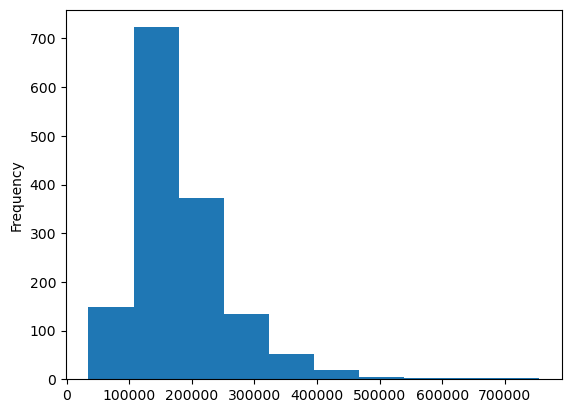

In [46]:
import matplotlib.pyplot as plt

df['SalePrice'].plot.hist()
plt.show()

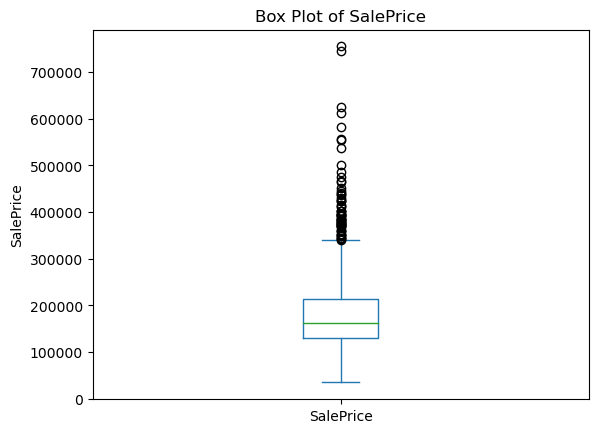

In [47]:
df['SalePrice'].plot.box()

plt.title("Box Plot of SalePrice")
plt.ylabel('SalePrice')

plt.show()

In [48]:
print(df['SalePrice'].quantile([0.05, 0.95]))

0.05     88000.0
0.95    326100.0
Name: SalePrice, dtype: float64


видим значительные выбросы в верхней части графика. Построим график, на котором будут заметны выбросы больше 3 стандартных квадратичных отклонений:

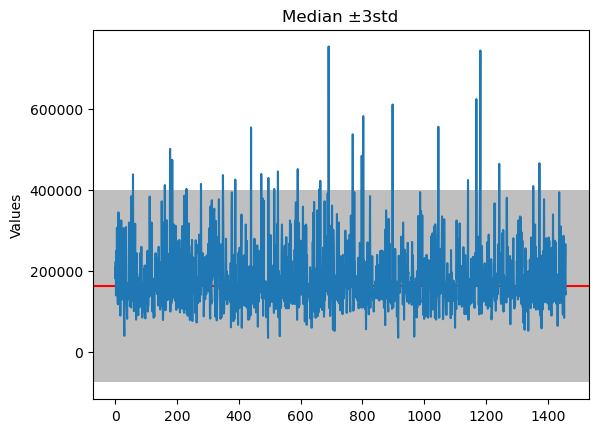

In [49]:
median = df['SalePrice'].median()
std = df['SalePrice'].std()
lower = median - 3 * std
upper = median + 3 * std

plt.axhline(median, color='r')
plt.axhspan(lower, upper, facecolor='0.5', alpha=0.5)

df['SalePrice'].plot()

plt.title("Median ±3std")
plt.ylabel("Values")

plt.show()

In [ ]:
corr = df.corr()
print(corr['SalePrice']['OverallQual'])

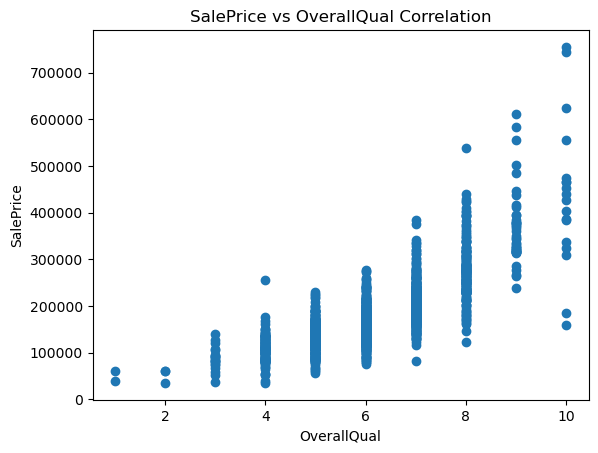

In [52]:
plt.scatter(df['OverallQual'], df['SalePrice'])

plt.xlabel('OverallQual')  
plt.ylabel('SalePrice')
plt.title('SalePrice vs OverallQual Correlation')

plt.show()

видим высокую положительную корреляцию между столбцами SalePrice и OverallQual

In [ ]:
corr = df.corr()
print(corr['SalePrice']['GrLivArea'])

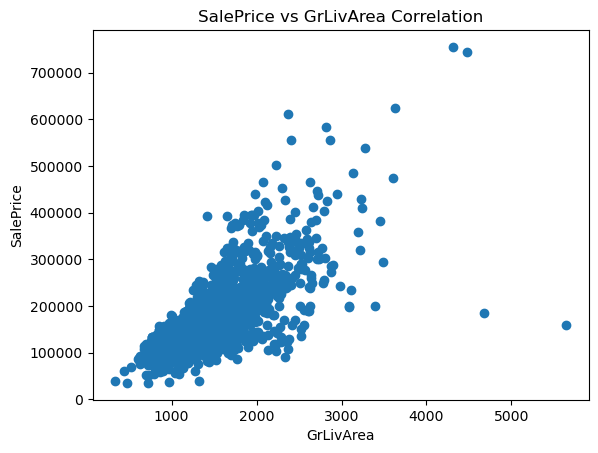

In [56]:
plt.scatter(df['GrLivArea'], df['SalePrice'])

plt.xlabel('GrLivArea')  
plt.ylabel('SalePrice')
plt.title('SalePrice vs GrLivArea Correlation')

plt.show()

In [57]:
corr = df.corr()
print(corr['SalePrice']['GarageCars'])

0.6404091972583519


C:\Temp\ipykernel_7600\3359504877.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


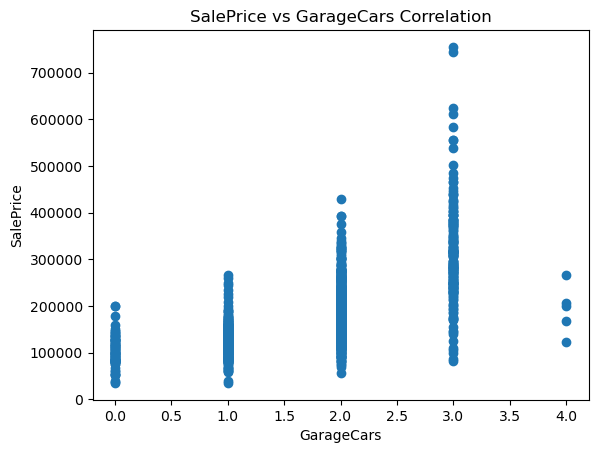

In [58]:
plt.scatter(df['GarageCars'], df['SalePrice'])

plt.xlabel('GarageCars')  
plt.ylabel('SalePrice')
plt.title('SalePrice vs GarageCars Correlation')

plt.show()

Корреляция умеренная положительная

In [ ]:
df.to_csv('cleaned_house_prices.csv', index=False)